# Features in Dataset

- **Snoring Rate**: Indicates the frequency of snoring.
- **Respiratory Rate**: Refers to the number of breaths taken per minute.
- **Body Temperature**: Measured in degrees Fahrenheit or Celsius.
- **Limb Movement**: Represents the number of limb movements.
- **Blood Oxygen**: Percentage of oxygen saturation in the blood.
- **Eye Movement**: Could represent the frequency or intensity of eye movements.
- **Sleep Hours**: Total hours of sleep recorded.
- **Heart Rate**: Measured in beats per minute.
- **Stress Levels**: A binary indicator (0 or 1) indicating the presence or absence of stress.


# Initialization 

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
data_path = '../Dataset/Human Stress Dataset.csv'
dataset = pd.read_csv(data_path)

# Data Normalization and Standardization

### Normalization :
scales the data to range [0,1]

In [38]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select features to normalize (exclude target variable)
features = dataset.columns[:-1]  # Exclude 'Stress Levels'
normalized_data = dataset.copy()

# Normalize the feature columns
normalized_data[features] = scaler.fit_transform(dataset[features])

# Display normalized data
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
   Snoring Rate  Respiratory Rate  Body Temperature  Limb Movement  \
0      0.887273          0.691429          0.488571       0.840000   
1      0.848000          0.650286          0.468000       0.792000   
2      0.272727          0.285714          0.785714       0.400000   
3      0.741091          0.538286          0.412000       0.661333   
4      0.056727          0.089143          0.919429       0.166400   

   Blood Oxygen  Eye Movement  Sleep Hours  Heart Rate  Stress Levels  
0      0.522667      0.880000     0.204444    0.691429              1  
1      0.503467      0.864000     0.172444    0.650286              1  
2      0.866667      0.555556     0.777778    0.285714              0  
3      0.451200      0.820444     0.085333    0.538286              1  
4      0.949867      0.277333     0.916444    0.089143              0  


### Standardization
transforms the data to have a mean of 0 and a standard deviation of 1.

In [36]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select features to standardize (exclude target variable)
standardized_data = dataset.copy()

# Standardize the feature columns
standardized_data[features] = scaler.fit_transform(dataset[features])

# Display standardized data
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
   Snoring Rate  Respiratory Rate  Body Temperature  Limb Movement  \
0      1.146845          0.979066         -0.272195       1.140539   
1      1.035260          0.833720         -0.353853       0.972949   
2     -0.599252         -0.454206          0.907316      -0.395697   
3      0.731501          0.438056         -0.576145       0.516734   
4     -1.212970         -1.148636          1.438095      -1.211299   

   Blood Oxygen  Eye Movement  Sleep Hours  Heart Rate  Stress Levels  
0     -0.271838      0.934005    -0.609407    0.979066              1  
1     -0.345696      0.873421    -0.703767    0.833720              1  
2      1.051448     -0.294506     1.081206   -0.454206              0  
3     -0.546753      0.708498    -0.960635    0.438056              1  
4      1.371498     -1.347997     1.490099   -1.148636              0  


# Basic Statistical Summary

In [40]:
# Basic statistical summary
summary_stats = dataset.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Snoring Rate  Respiratory Rate  Body Temperature  Limb Movement  \
count    630.000000        630.000000         630.00000     630.000000   
mean      71.600000         21.800000          92.80000      11.700000   
std       19.372833          3.966111           3.52969       4.299629   
min       45.000000         16.000000          85.00000       4.000000   
25%       52.500000         18.500000          90.50000       8.500000   
50%       70.000000         21.000000          93.00000      11.000000   
75%       91.250000         25.000000          95.50000      15.750000   
max      100.000000         30.000000          99.00000      19.000000   

       Blood Oxygen  Eye Movement  Sleep Hours  Heart Rate  Stress Levels  
count    630.000000    630.000000   630.000000  630.000000     630.000000  
mean      90.900000     88.500000     3.700000   64.500000       0.600000  
std        3.902483     11.893747     3.054572    9.915277       0.490287  
min      

#### In the above summary:

- **Count**: Total number of observations for each variable (all variables have 630 observations).
- **Mean**: The average value of the variable.
- **Standard Deviation (std)**: Indicates the amount of variation or dispersion from the mean.
- **Minimum (min)**: The smallest recorded value.
- **25th Percentile (25%)**: The value below which 25% of the observations fall (first quartile).
- **Median (50%)**: The middle value when the data is sorted (second quartile).
- **75th Percentile (75%)**: The value below which 75% of the observations fall (third quartile).
- **Maximum (max)**: The largest recorded value.

#### What does Standard Deviation signify :
Useful when data is approximately Normal.
In a normal distribution (bell curve), about 68% of the data points lie within one standard deviation of the mean, approximately 95% lie within two standard deviations, and about 99.7% lie within three standard deviations.

**Low Standard Deviation**: The data points tend to be close to the mean i.e the values are relatively consistent and clustered around the average.

**High Standard Deviation**: The data points are spread out over a wider range of values. This means there is more variability and less consistency among the observations.


For the snoring rate column, a standard deviation of 19.37 indicates the following:

**Spread of Data**: The snoring rates of individuals in the dataset *vary significantly* around the mean value of 71.6. This means that while the average snoring rate is 71.6, individual snoring rates can deviate from this average by about 19.37 units.
**Range of Values**: In practical terms, since the mean is 71.6:
Approximately 68% of individuals would have a snoring rate between 71.6−19.37 (approximately 52.23) and 71.6+19.37 (approximately 90.97).

This range indicates that many individuals snore at rates significantly below or above the average, showing considerable variability in snoring behavior within the population sampled.


# Check Class Balance

In [5]:
# Check class balance
class_balance = dataset['Stress Levels'].value_counts(normalize=True)

print("Class Balance (Stress Levels):")
print(class_balance)


Class Balance (Stress Levels):
Stress Levels
1    0.6
0    0.4
Name: proportion, dtype: float64


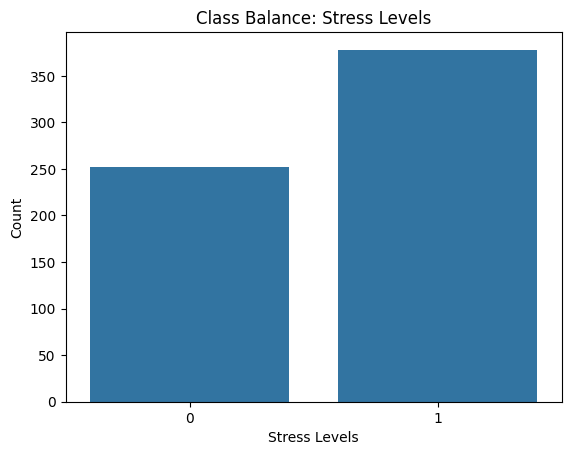

In [ ]:
# Visualize class balance
sns.countplot(x='Stress Levels', data=dataset)
plt.ylabel("Count")
plt.title("Class Balance: Stress Levels")
plt.show()


Check the balance between stressed and not stressed labels to ensure the model isn't biased due to class imbalance.

60% data falls under stressed class(1) and remaining 40% under not stressed(0).

# Data Vizualization

### Pie Chart

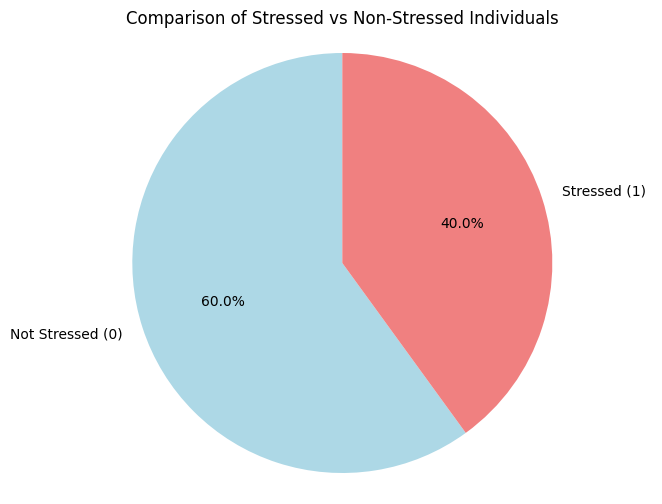

In [41]:
# pie chart for comparison of stressed vs non-stressed individuals (frequency)

stress_counts = dataset['Stress Levels'].value_counts()

labels = ['Not Stressed (0)', 'Stressed (1)']
sizes = stress_counts
colors = ['lightblue', 'lightcoral']

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Stressed vs Non-Stressed Individuals')
plt.axis('equal')
plt.show()

### Data Distributions

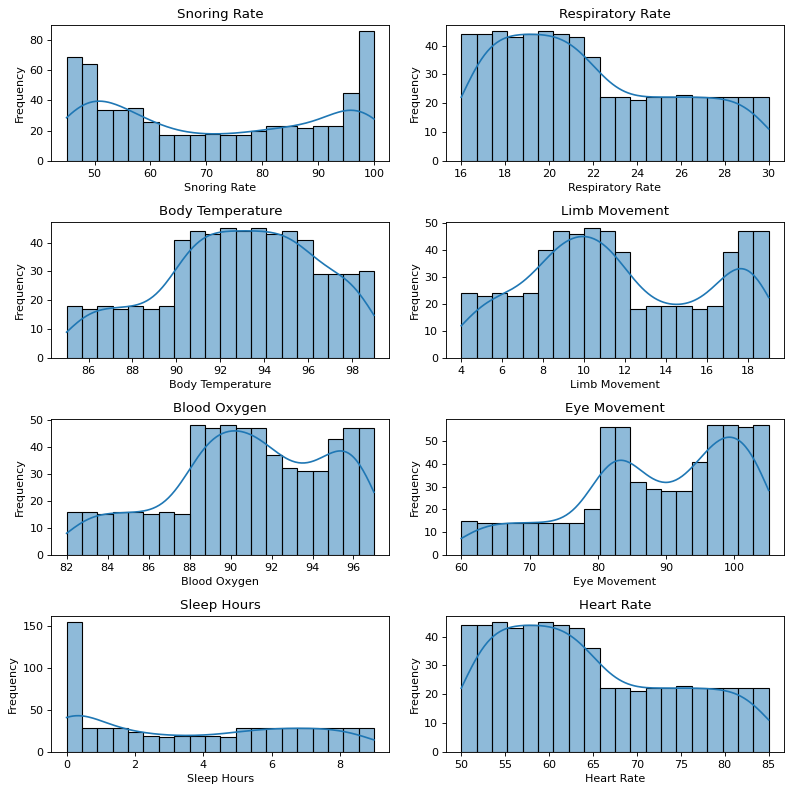

In [43]:
df = pd.DataFrame(dataset).drop(columns=['Stress Levels'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 10), dpi=80)

# Loop through each feature to create histograms and density plots
for i, column in enumerate(df.columns):
    plt.subplot(4, 2, i + 1)  # Create a 3x3 grid of subplots
    sns.histplot(df[column], bins=20, kde=True)  # Use histplot for histogram with KDE
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()

KDE - Kernel Distribution Estimate

A statistical tool used to estimate the PDF of a random variable.
It provides a smooth, continuous representation of the distribution of data points, making it easier to visualize the underlying distribution than a histogram alone.
Kernel is mathematical function which estimates PDF of RV.
This distribution is an estimate e.g gaussian, etc.

histplot -> stat='density'
this will make the y-axis values, 0-1, that are probability values.

### Correlation Analysis 

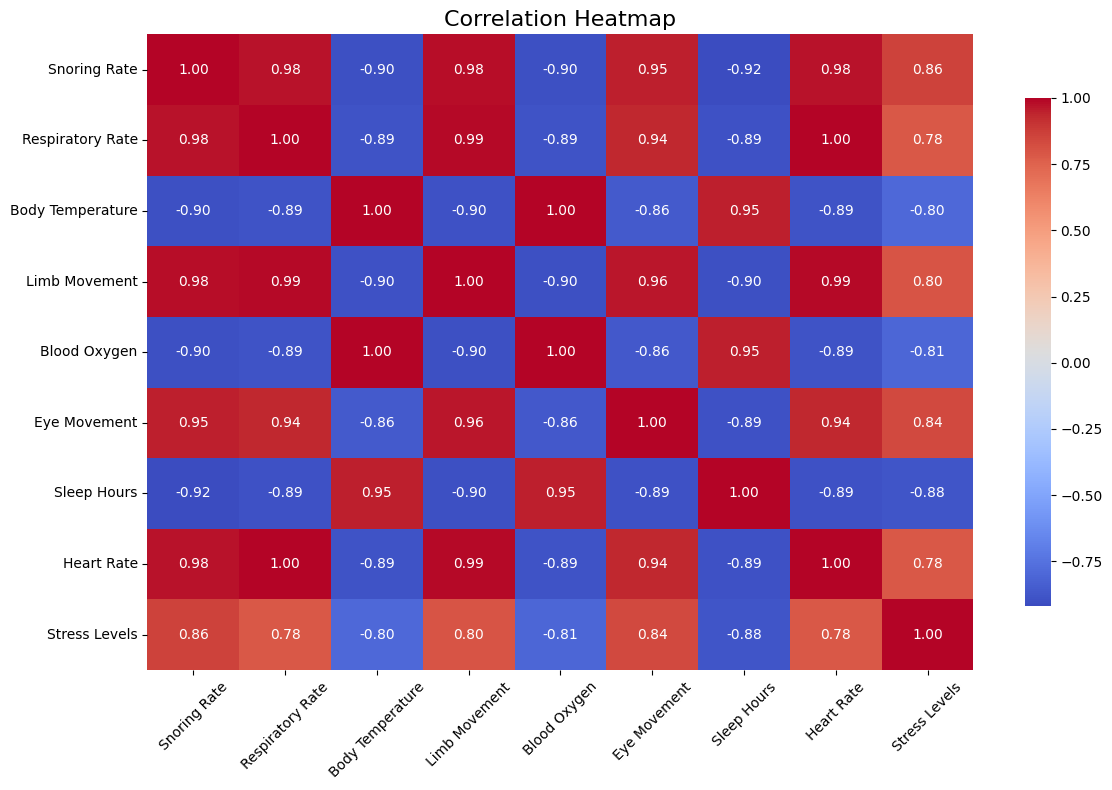

In [ ]:
df = pd.DataFrame(dataset)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Set title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts the padding of the plot

# Show the plot
plt.show()

The values range from -1 to 1, where:
- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 indicates no correlation.

**High Positive Correlation (near 1):** Variables that are highly *positively correlated* (close to 1) may contain *redundant information*.
**High Negative Correlation (near -1):** Variables that are highly negatively correlated might also indicate redundancy but in opposite directions.

In the Stress Levels columns, all features are greatly correlated with stress levels, i.e most of them are factors.

**Snoring Rate vs. Respiratory Rate:** 
A correlation of 0.98, showing a high positive correlation. This suggests that an increase in snoring rate is strongly associated with an increase in respiratory rate, indicating these features might be related or redundant.

### Boxplots and Outlier Detection

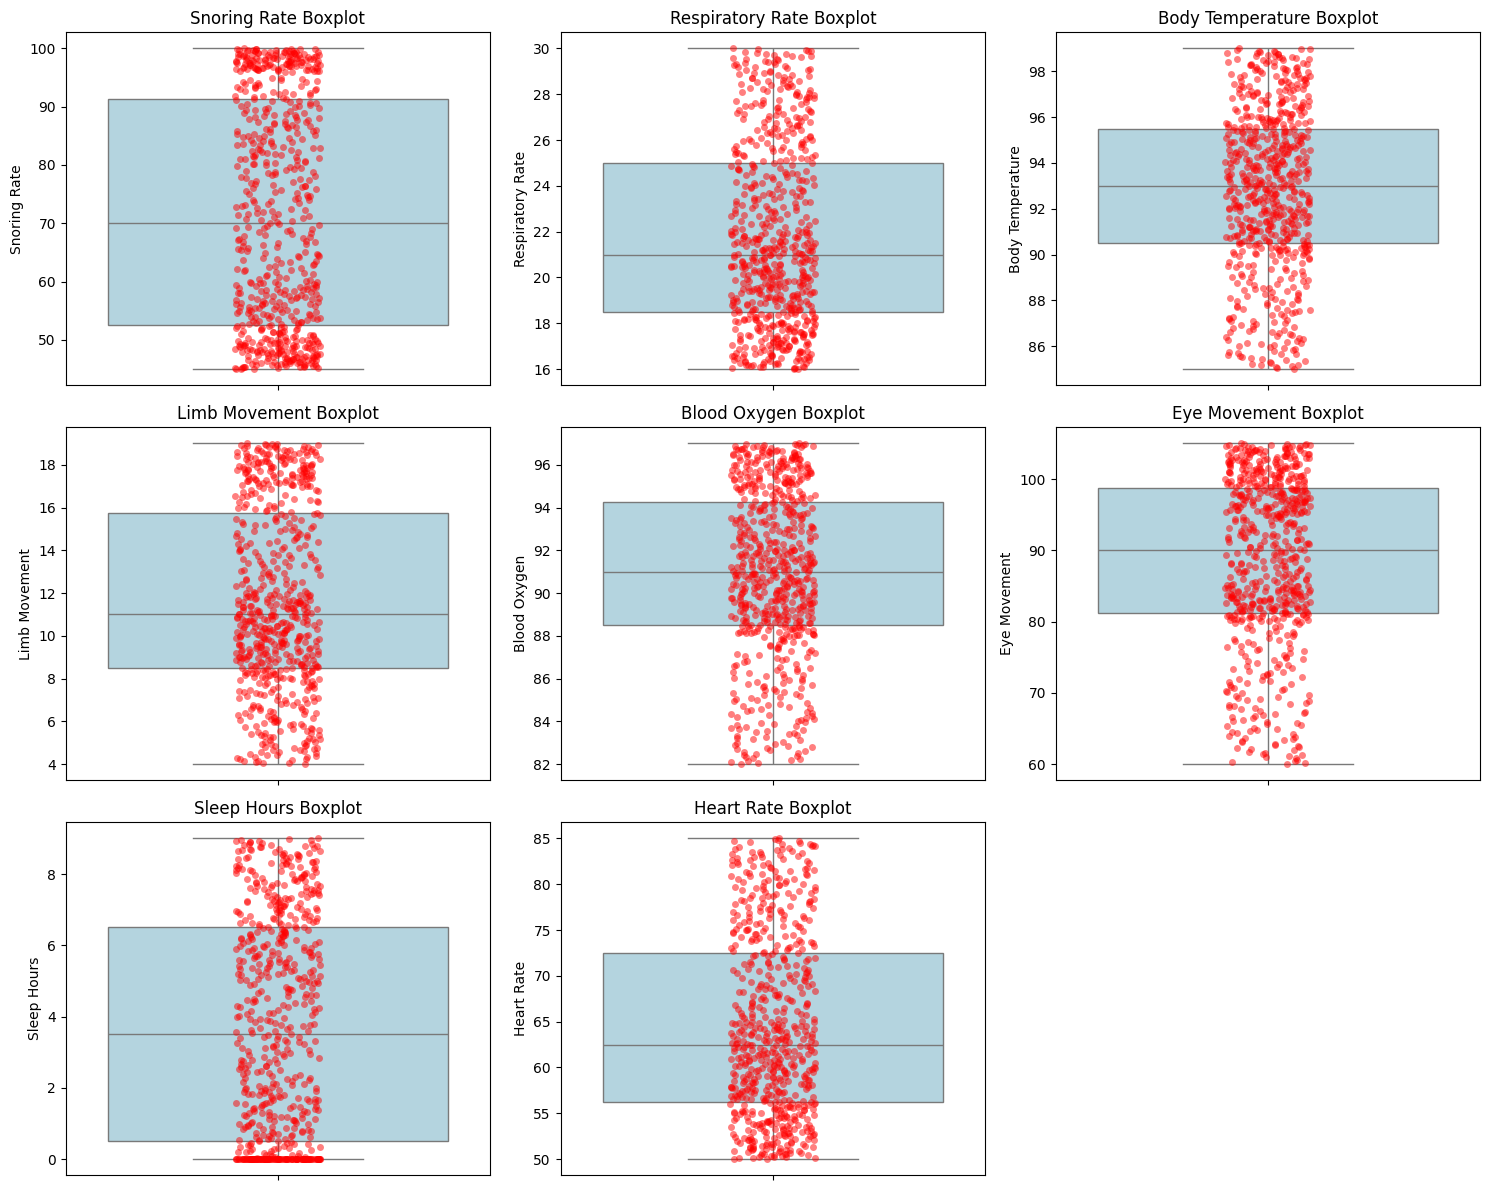

In [15]:
df = pd.DataFrame(dataset).drop(columns=['Stress Levels'])

# Set up the figure with an appropriate size to accommodate all features
plt.figure(figsize=(15, 12))

# Loop through each column to create a separate boxplot for each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=df[column], color="lightblue")  # 'y=df[column]' for a vertical boxplot
    sns.stripplot(y=df[column], color="red", alpha=0.5, jitter=True)
    plt.title(f'{column} Boxplot')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


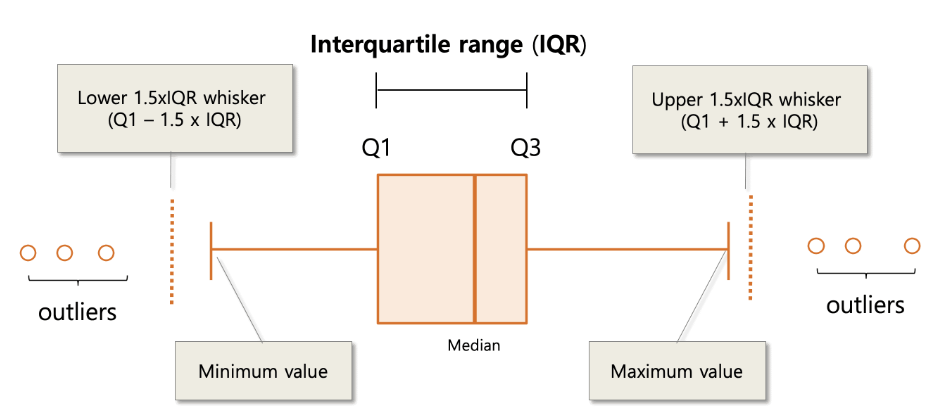

**Median**: The median marks the mid-point of the data and is shown by the line that divides the box into two parts.\
**Q1 Lower Quartile**: 25% of scores fall below the lower quartile value (also known as the first quartile).\
**Q3 Upper Quartile**: 75% of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.\
**Interquartile range (IQR)**: the middle 50% of scores. A measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.\
**Lower and upper 1.5*IQR whiskers**: These represent the limits and boundaries for the outliers.\
**Outliers**: Defined as observations that fall below Q1 − 1.5\*IQR or above Q3 + 1.5\*IQR. Outliers are displayed as dots or circles.

*In the output above, no outliers are there.*

### Pair Plot

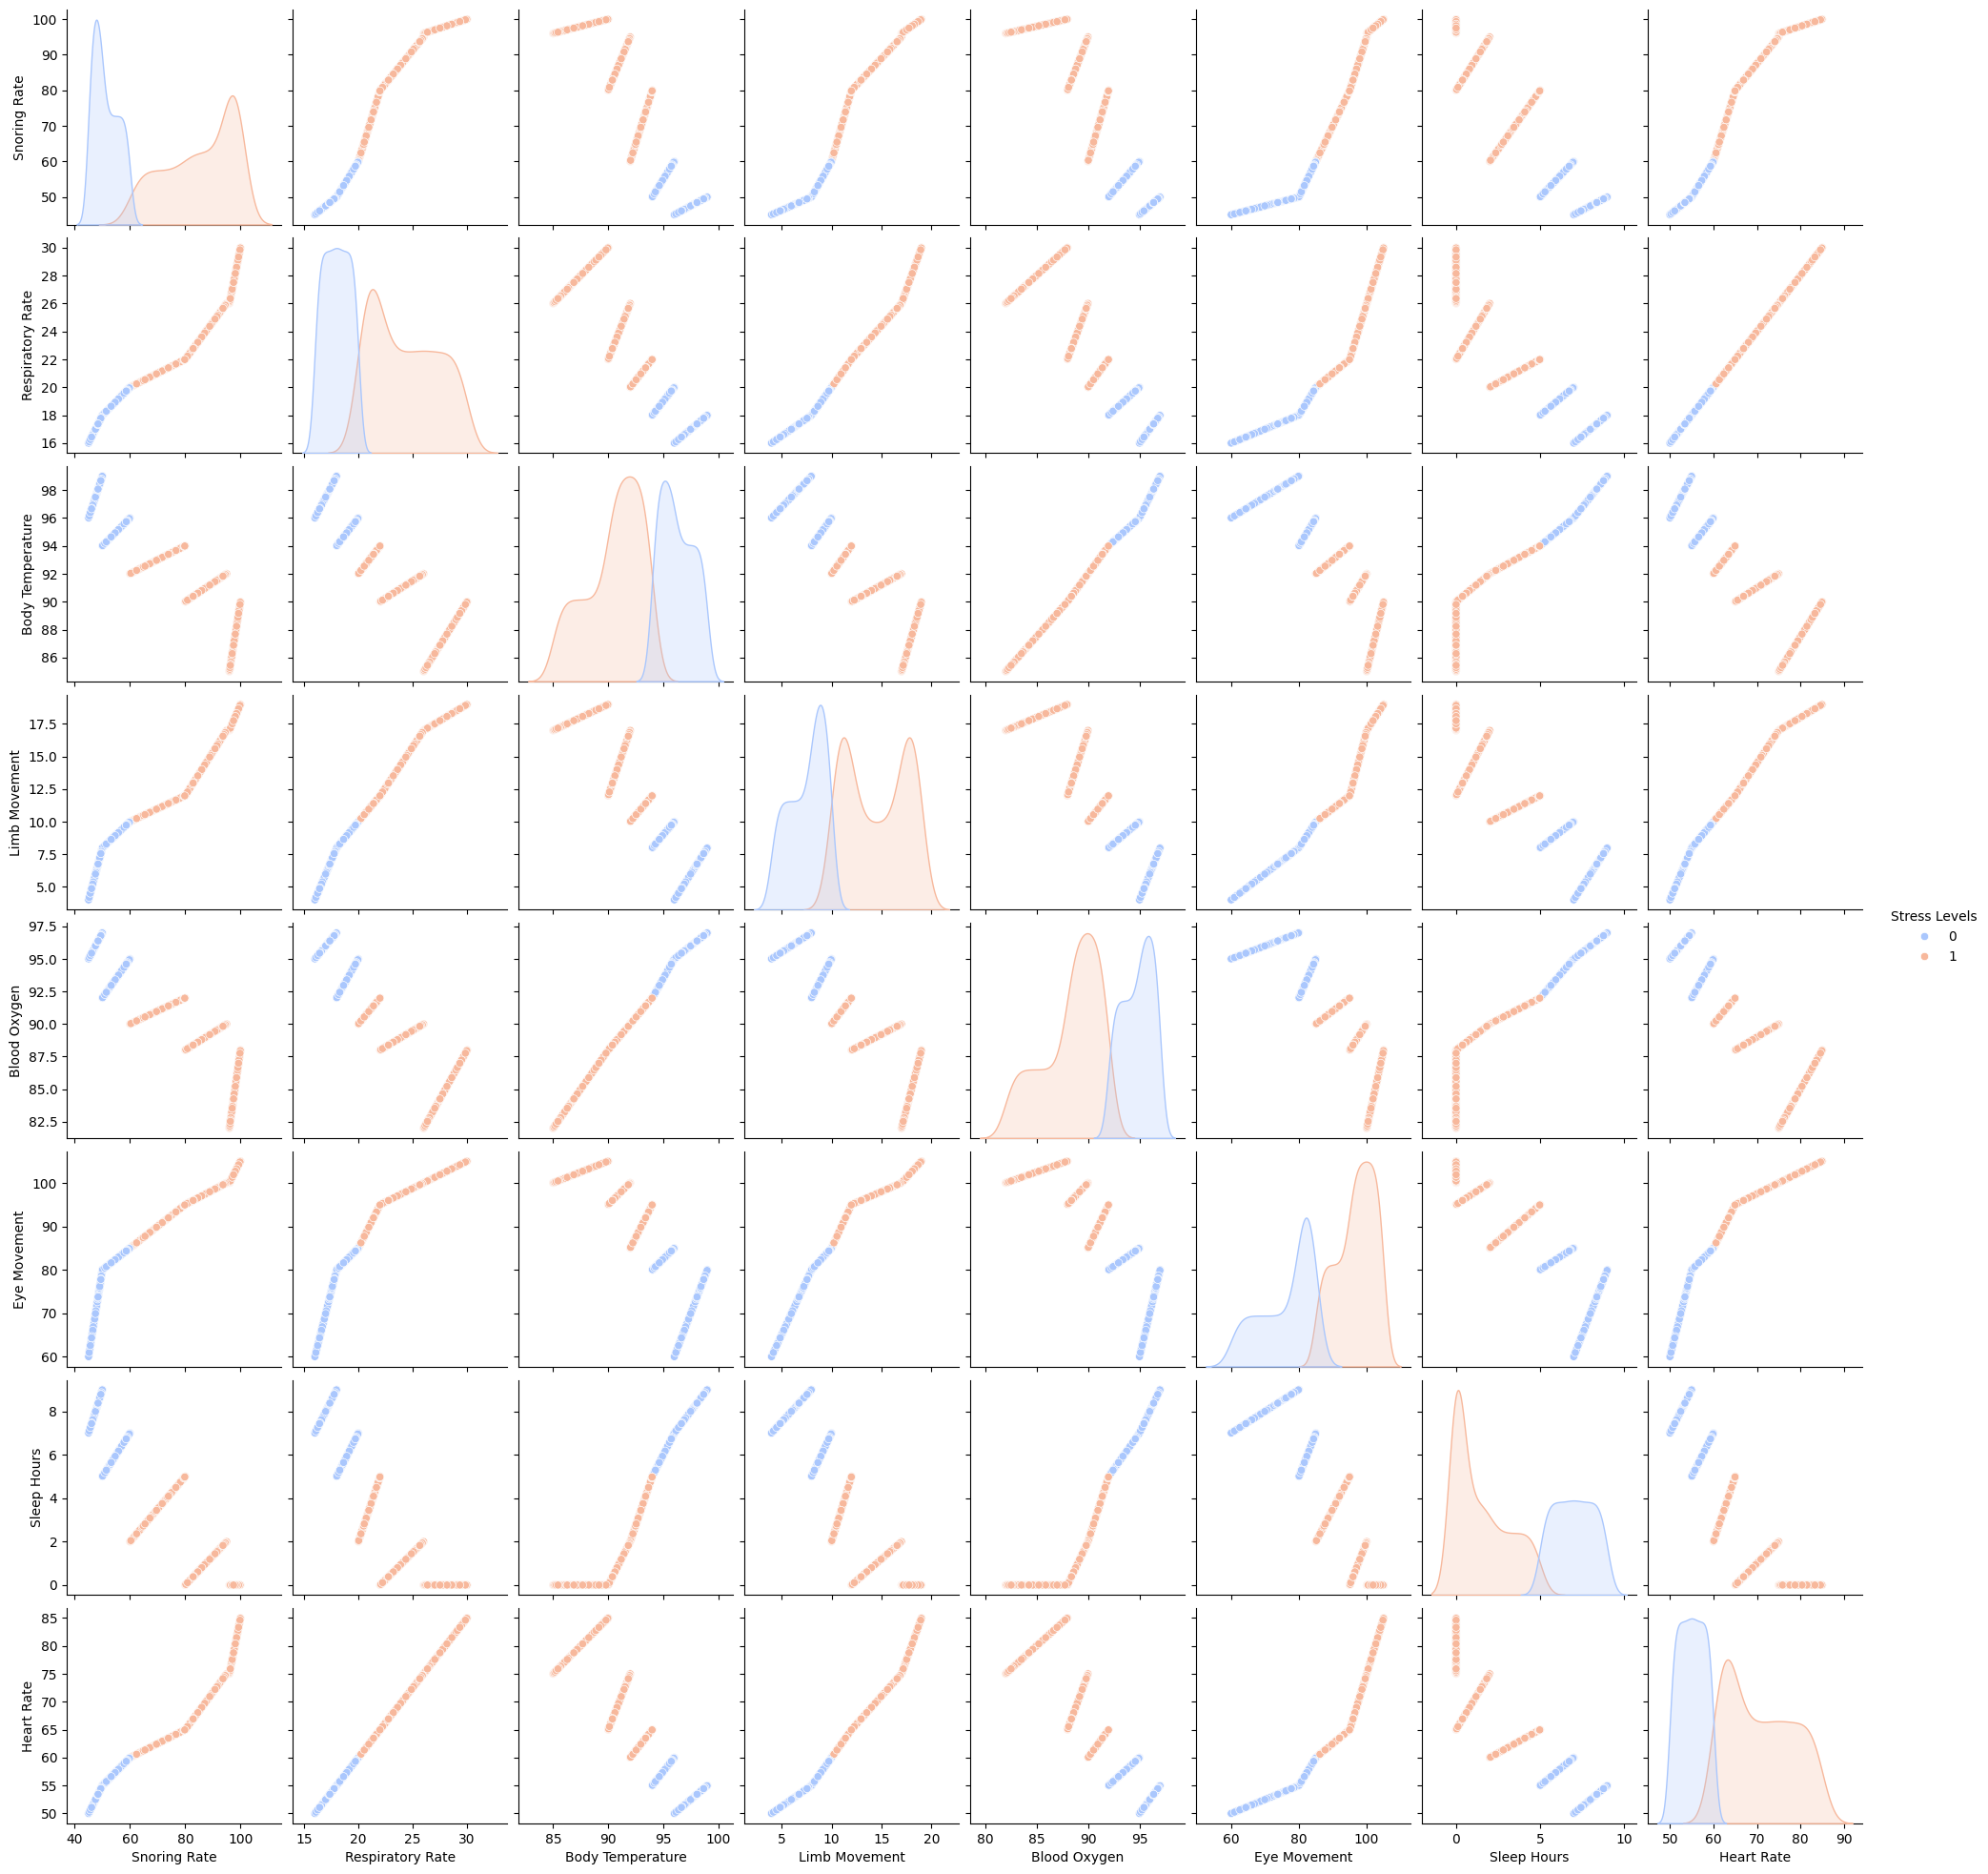

In [24]:
# Create pair plot, with 'Stress Levels' as the hue to color code by target variable
df = pd.DataFrame(dataset)
sns.pairplot(df, hue="Stress Levels", palette="coolwarm", diag_kind="kde")

**For Diagonal Plots ->**

**Multi-Modality:**\
If a KDE plot has multiple peaks, this feature may have multiple modes (e.g., bimodal or multimodal distributions), suggesting that there could be different subgroups in the data for that feature.

e.g: Limb Movement have 2 peaks which may correspond to low and high limb movement freq.

### Feature Relationships by Stress Level

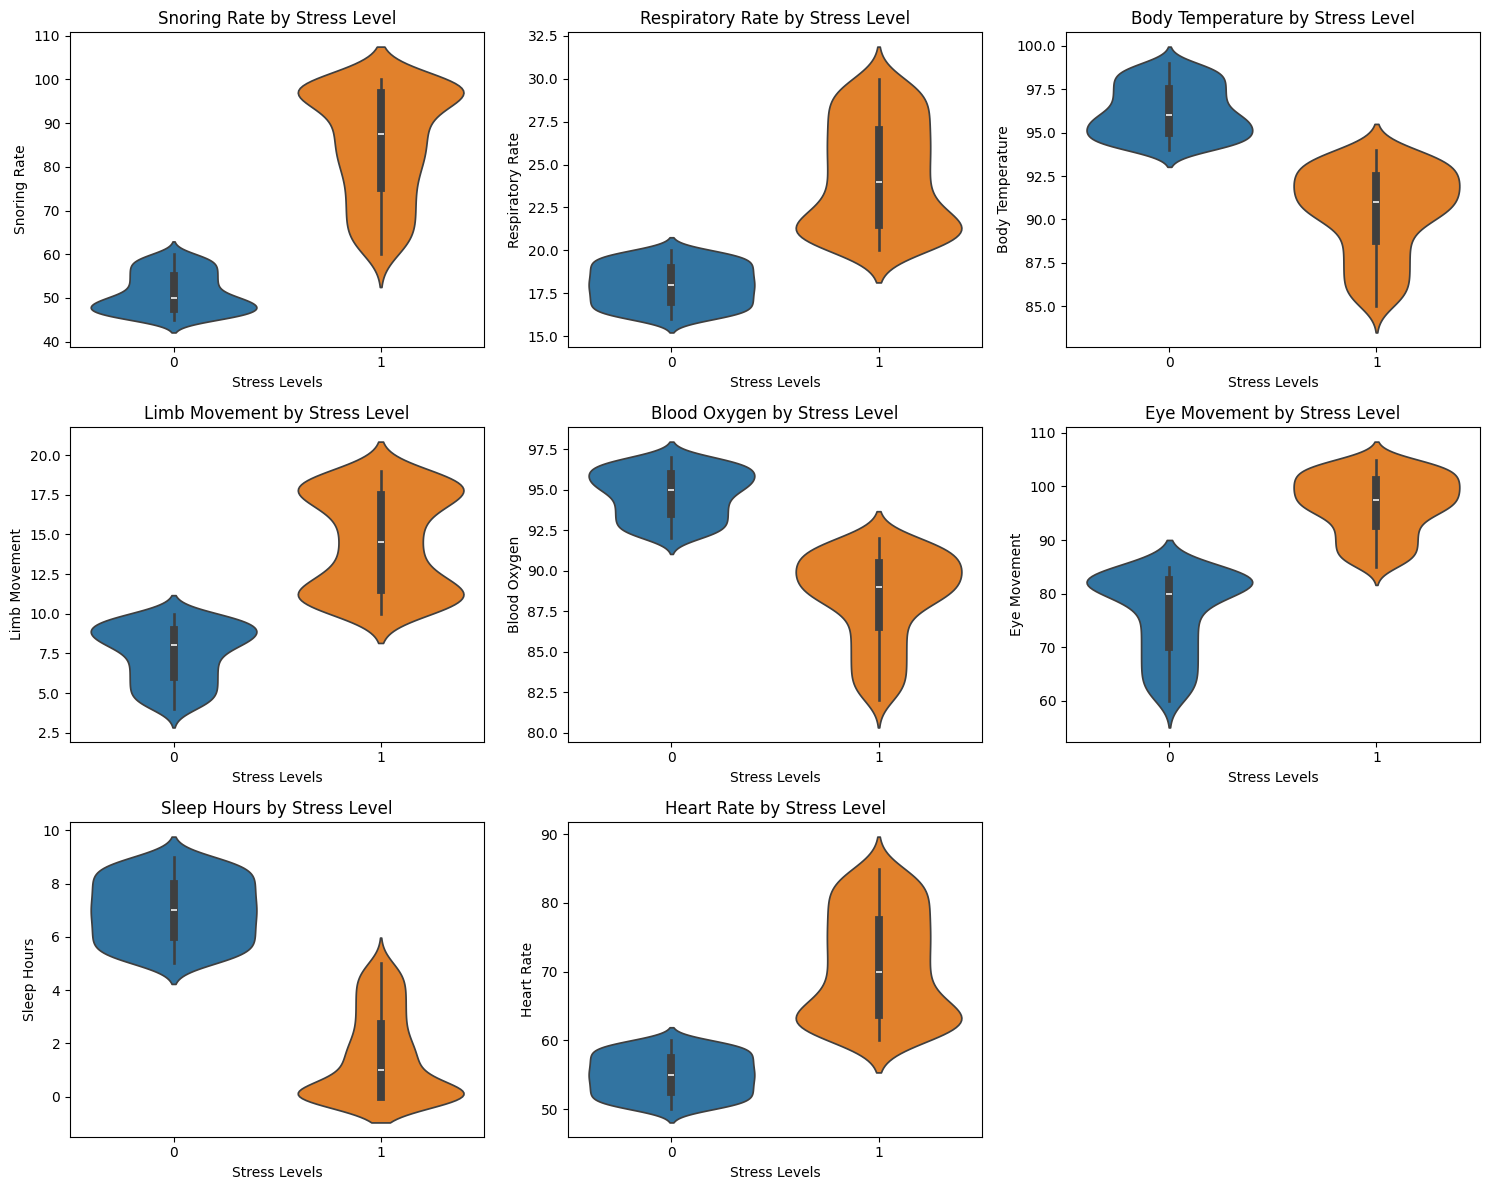

In [30]:
df = pd.DataFrame(dataset)

# Set up the figure size
plt.figure(figsize=(15, 12))

# Loop through each feature to create a violin plot for each, grouped by stress levels
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Stress Levels' column itself
    plt.subplot(3, 3, i)  # Adjust the grid as needed
    sns.violinplot(x="Stress Levels", hue="Stress Levels", y=column, data=df, legend=False)
    plt.title(f'{column} by Stress Level')
    plt.xlabel("Stress Levels")
    plt.ylabel(column)

plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

Wider sections indicate a higher density of data points at that value.

Features with visibly different distributions or central tendencies between stress levels may have strong predictive power. For example, if "Heart Rate" has a higher median or wider spread for stressed individuals, it may indicate that high heart rates are associated with stress.